In [4]:
import pandas as pd

# 데이터프레임 생성
data = [
    ["1,000", "1,100", '1,510'],
    ["1,410", "1,420", '1,790'],
    ["850", "900", '1,185'],
]
columns = ["03/02", "03/03", "03/04"]
df = pd.DataFrame(data=data, columns=columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   03/02   3 non-null      object
 1   03/03   3 non-null      object
 2   03/04   3 non-null      object
dtypes: object(3)
memory usage: 204.0+ bytes


In [91]:
from pandas import DataFrame

data = [
    [1416, 1416, 2994, 1755],
    [6.42, 17.63, 21.09, 13.93],
    [1.10, 1.49, 2.06, 1.88]
]

columns = ["2018/12", "2019/12", "2020/12", "2020/12(E)"]
index = ["DPS", "PER", "PBR"]

df = DataFrame(data=data, index=index, columns=columns)
df

,2018/12,2019/12,2020/12,2020/12(E)
DPS,1416.00,1416.00,2994.00,1755.00
PER,6.42,17.63,21.09,13.93
PBR,1.10,1.49,2.06,1.88


In [93]:
df.filter(items = ['PER'], axis=0)

,2018/12,2019/12,2020/12,2020/12(E)
PER,6.42,17.63,21.09,13.93


In [ ]:
## 정규표현식으로 활용해서 행과 열을 조회

In [19]:
df.filter(regex='2018')

,2018/12
DPS,1416.00
PER,6.42
PBR,1.10


In [22]:
# 행을 조회할 건데, R이 들어간 것만 조회
df.filter(regex = 'R',axis=0)

,2018/12,2019/12,2020/12,2020/12(E)
PER,6.42,17.63,21.09,13.93
PBR,1.10,1.49,2.06,1.88


In [18]:
#행을 조회할 건데, R로 끝나는 모든 패턴을 조회
df.filter(regex='R$', axis = 0)

,2018/12,2019/12,2020/12,2020/12(E)
PER,6.42,17.63,21.09,13.93
PBR,1.10,1.49,2.06,1.88


In [97]:
df.filter(regex='R$', axis=0)

,2018/12,2019/12,2020/12,2020/12(E)
PER,6.42,17.63,21.09,13.93
PBR,1.10,1.49,2.06,1.88


In [95]:
df.filter(regex='4')

""
DPS
PER
PBR


In [ ]:
#print(df.head())
df = df.reset_index()
#print(df.head(1))
#print(df.info())

#column 추가

분기 = print(df['일자'].dt.quarter)
연도 = print(df['일자'].dt.year)
월 = print(df['일자'].dt.month)
일 =print(df['일자'].dt.day)

## plotly(라이브러리) 시각화 연습

In [1]:
import plotly

plotly.__version__

'5.24.1'

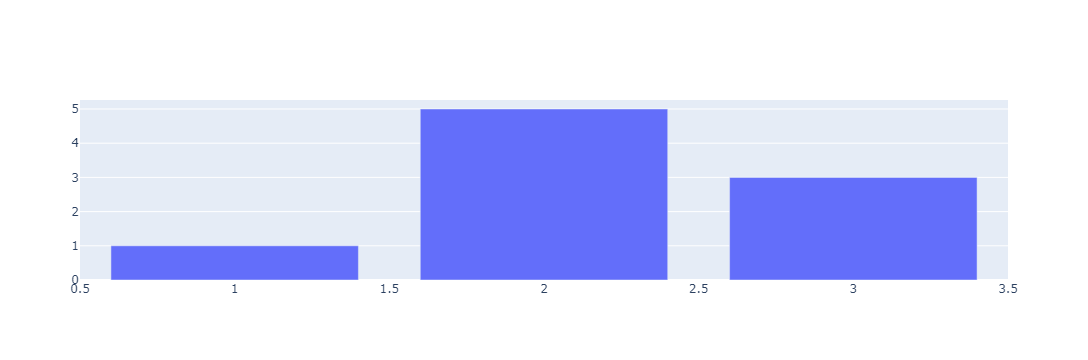

In [8]:
#방법 1
import plotly.graph_objects as go #matplotlib와 개념 유사

fig = go.Figure()
fig.add_trace(go.Bar(x=[1,2,3], y=[1,5,3]))
fig.show()

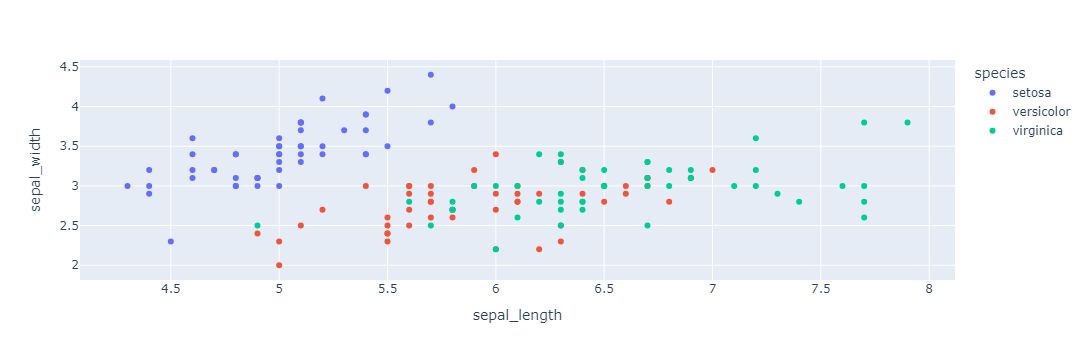

In [10]:
# 방법2
import plotly.express as px #seaborn과 개념적으로 유사

iris = px.data.iris()

fig = px.scatter(iris, x = 'sepal_length', y='sepal_width',color='species')
fig.show()


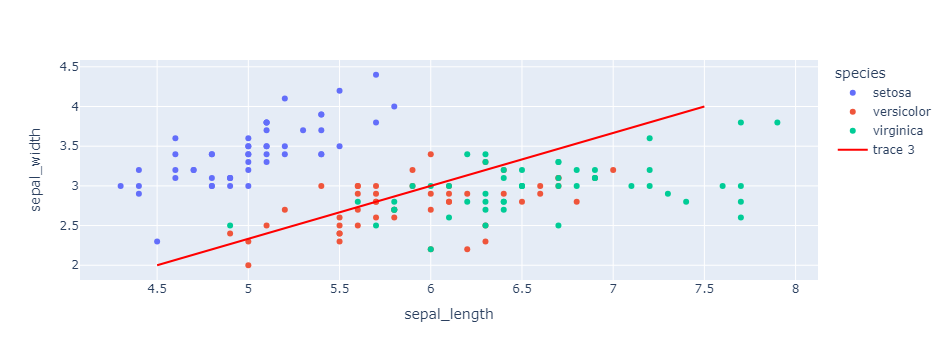

In [105]:
#라인차트를 만들고 싶어요
import plotly.express as px #seaborn과 개념적으로 유사
import plotly.graph_objects as go

iris = px.data.iris()
fig = px.scatter(iris, x = 'sepal_length', y='sepal_width',color='species')
fig.add_trace(
    go.Scatter(
        x = [4.5, 7.5], # x축의 범위
        y=[2,4],
        mode = "lines", #직선을 그리겠다
        line = go.scatter.Line(color="red"),
        
    )
)
fig.show()

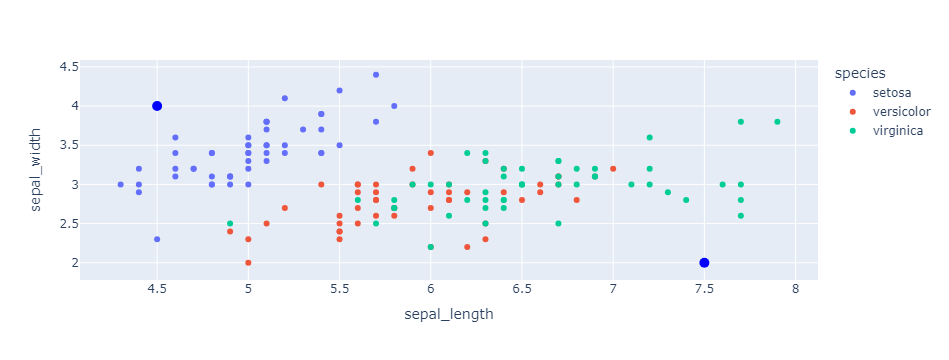

In [16]:
import plotly.express as px #seaborn과 개념적으로 유사
import plotly.graph_objects as go

iris = px.data.iris()
fig = px.scatter(iris, x = 'sepal_length', y='sepal_width',color='species')

fig.add_trace( # 또 다른 추가 차트를 그리겠다
    go.Scatter(
        x = [4.5, 7.5], # x축의 범위
        y=[4,2],
        mode = "markers", #마크 표시할게요
        marker=dict(size=10,color="blue"),
        showlegend=False
    )
)
fig.show()

## plotly 기본문법

In [17]:
#express 

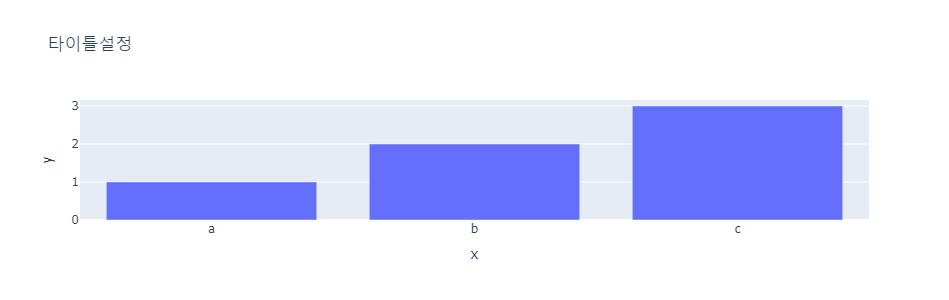

In [31]:
# express
fig = px.bar(x = ["a", "b", "c"], 
             y = [1, 3, 2], width = 600, height = 300, 
             title = "타이틀 설정")
fig.show()

In [22]:
#group object

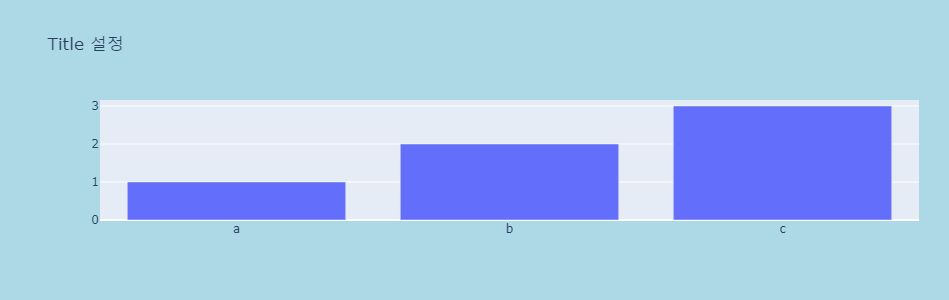

In [33]:
fig = go.Figure(data=[go.Bar(x = ["a","b", "c"], y=[1, 2, 3],)],
               layout = go.Layout(title=go.layout.Title(text = "Title 설정"))
               )



fig.update_layout(width =600, 
                 height =300,
                 margin_l = 100,
                 margin_r =30,
                
                 
                 #백그라운드 색상 지정
                 paper_bgcolor = "lightblue"
                 )
fig.show()

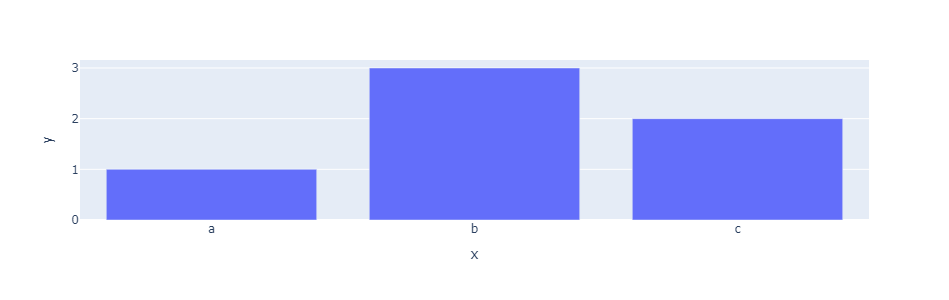

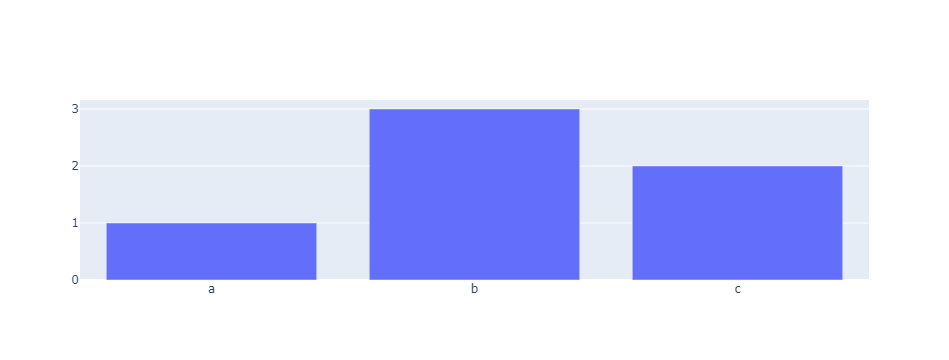

In [34]:
# express
fig = px.bar(x = ["a", "b", "c"], 
             y = [1, 3, 2], width = 600, height = 300)
fig.show()

# graph_object 
fig = go.Figure(data=[go.Bar(x = ["a", "b", "c"], y = [1, 3, 2])])

fig.show()

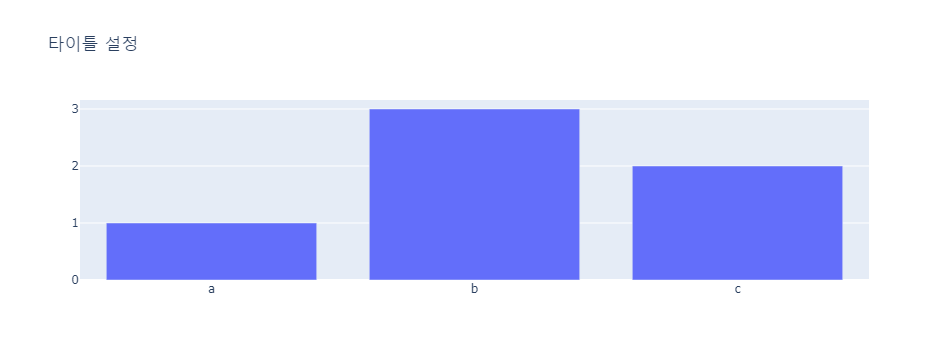

In [35]:
# graph_object 
fig = go.Figure(data=[go.Bar(x = ["a", "b", "c"], y = [1, 3, 2])])
fig.update_layout(title_text = "타이틀 설정")
fig.show()

## Hover 설정

In [36]:
df= px.data.gapminder().query("continent=='Oceania'")
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1099,New Zealand,Oceania,1987,74.320,3317166,19007.19129,NZL,554
1100,New Zealand,Oceania,1992,76.330,3437674,18363.32494,NZL,554
1101,New Zealand,Oceania,1997,77.550,3676187,21050.41377,NZL,554
1102,New Zealand,Oceania,2002,79.110,3908037,23189.80135,NZL,554
1103,New Zealand,Oceania,2007,80.204,4115771,25185.00911,NZL,554


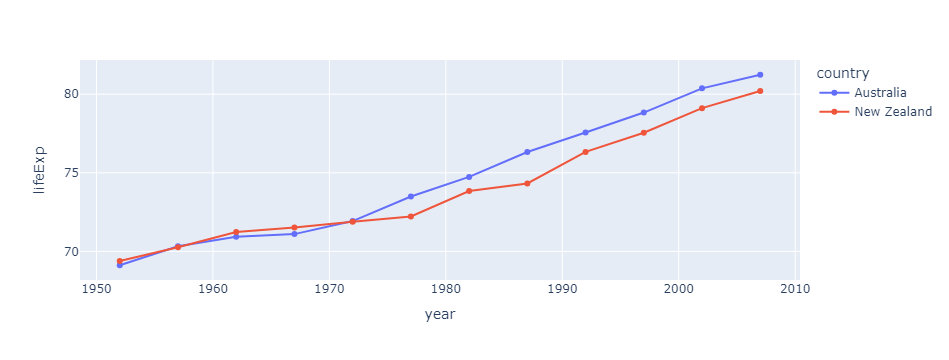

In [45]:
fig = px.line(df, x = 'year', y = 'lifeExp', color = 'country')

# 그래프 내부의 색상, 모양 등등 변경 : update_traces() 
fig.update_traces(mode="markers+lines")

#Hover 설정
fig.update_layout(hovermode='x') #x,y축 변경해보기
#호버모드는 어디서 변경? update_traces or update_layout ? -- update_layout 
fig.show()

## plotly는 update_traces or update_layout에서 뭘 선택할지가 매우 중요

## 캔들 차트

In [74]:
import yfinance as yf
import plotly.graph_objects as go 

indo = yf.download("INDO", start = "2023-01-01", end = "2024-09-30")
indo=indo.reset_index()
indo.tail()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
432,2024-09-23,2.69,2.78,2.630,2.76,2.76,505700
433,2024-09-24,2.76,2.77,2.615,2.65,2.65,441300
434,2024-09-25,2.67,2.67,2.510,2.55,2.55,513600
435,2024-09-26,2.48,2.51,2.380,2.43,2.43,332300
436,2024-09-27,2.45,2.48,2.390,2.47,2.47,788600


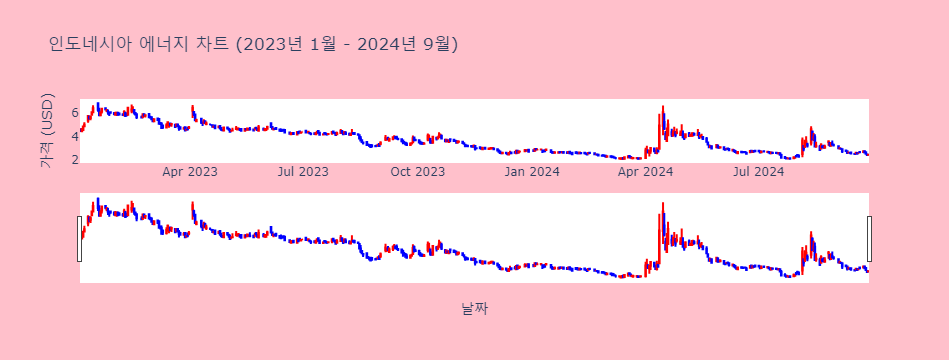

In [87]:
fig = go.Figure(data=[go.Candlestick(x=indo['Date'],
                open=indo['Open'],
                high=indo['High'],
                low=indo['Low'],
                close=indo['Close'])])



#update_layout(그래프의 외양)
#계속 축적하여 플러스++
#차트 제목, 축 레이블 설정
fig.update_layout(
    title='인도네시아 에너지 차트 (2023년 1월 - 2024년 9월)',  # 차트 제목
    xaxis_title='날짜',  # x축 레이블
    yaxis_title='가격 (USD)',# y축 레이블
    hovermode='x',
    xaxis_rangeslider_visible=True,
    xaxis_rangeslider_thickness = 0.5, # 축 두깨
    paper_bgcolor = 'pink',
    plot_bgcolor = 'white',

)

#update_traces
#캔들차트의 색상을 변경
fig.update_traces(
    increasing_line_color="red",  # 상승 캔들 색상
     decreasing_line_color="blue")  # 하락 캔들 색상



fig.show()

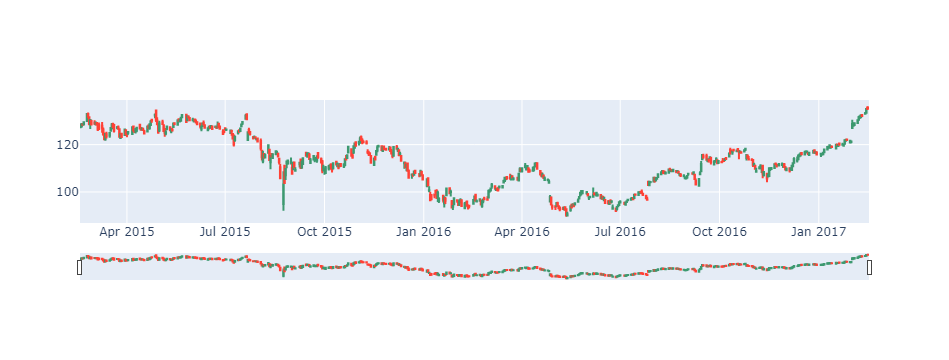

In [59]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

fig.show()